# Quantum Teleportation

This is an algorithm to communicate 1 qubit from a sender (say Alice) to a reciever (say Bob) by means of commmunicating two classical bits, if they start out with an entangled pair of qubits in the bell state $\frac{|00\rangle +|11\rangle}{\sqrt{2}}$.

In [1]:
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram,plot_state_qsphere, plot_bloch_multivector, plot_state_city

First let us generate the entangled pair of qubits $q_1$ (Alice's) and $q_2$ (Bob's). The qubit $q_0$ is present with ALice and is to be teleported to Bob. The entangled pair is generated by the below circuit. 

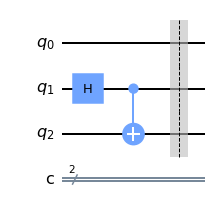

In [2]:
tel = QuantumCircuit(3,2)
tel.h(1)
tel.cx(1,2)
tel.barrier()
tel.draw('mpl')

Now, Alice interacts her qubit $q_1$ of the entangled pair with $q_0$ as shown by applying CNOT(0,1) and H(0) gates and then both qubits are measured and the results of measurement are made known to Bob. If $q_1$ returns 1 on measurement then Bob applies an X gate on $q_2$. If $q_0$ returns 1 then Bob subsequently applies Z gate to $q_2$. These if conditions have been implemented with controlled quantum gates below (for convenience) but Bob can do the same using if conditions on the recieved bits. The resulting state of $q_2$ will now be the same as that of $q_0$ in the start and the qubit has been teleported to Bob.

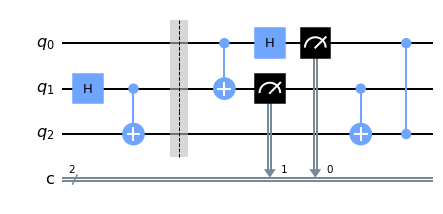

In [3]:
tel.cx(0,1)
tel.h(0)
tel.measure([0,1],[0,1])
tel.cx(1,2)
tel.cz(0,2)
tel.draw('mpl')

Below, we create a separate quantum circuit to put the qubit $q_0$ in a state $\frac{|0\rangle +|1\rangle}{\sqrt{2}}$ so that we have a somewhat non trivial qubit to teleport.

In [4]:
qc = QuantumCircuit(3,2)
qc.h(0)

Now we test the circuit with a simulation. Below we show the starting state of each qubit before entanglement or teleportation on bloch spheres. The qubit to be teleported is in the state we decided above.

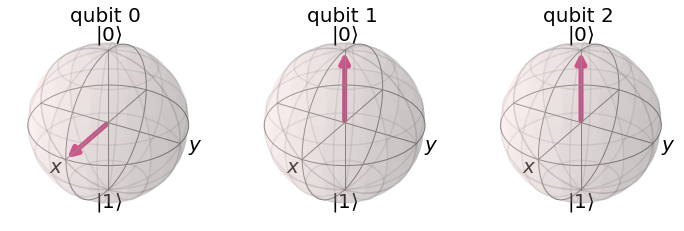

In [5]:
backend = BasicAer.get_backend('statevector_simulator')
result = execute(qc, backend).result()
q = result.get_statevector(qc)
plot_bloch_multivector(q)

Below is the state of each qubit after the teleportation. As we can see the prior state of $q_0$ is now taken by $q_2$ and the teleportation was successful, While $q_0$ and $q_1$ have collapsed randomly into a basis state after measurement. Thus the algorithm ran successfully.

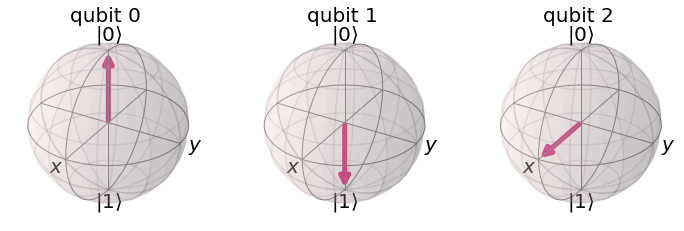

In [7]:
qc += tel
backend = BasicAer.get_backend('statevector_simulator')
result = execute(qc, backend).result()
q = result.get_statevector(qc)
plot_bloch_multivector(q)